**Import required libaries**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


**Connect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read json formate Data**

In [ ]:
import pandas as pd
df = pd.read_json (r'/content/drive/My Drive/news.json',lines=True)
df = df[['category','headline','short_description']]
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


**Data preprocessing**

**1. Remove Na values**

In [ ]:
df = df.dropna(how = 'any')
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


**2. Creating new feature**

In [ ]:
df['text'] = df['headline'] + df['short_description']

***Display***

In [ ]:
df

,category,headline,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...


**3. keeping important variables**

In [ ]:
df = df[['category','text']]

In [ ]:
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


**4. used groupby to check count**

In [ ]:
df.groupby('category').count()

,text
category,
ARTS,1509
ARTS & CULTURE,1339
BLACK VOICES,4528
BUSINESS,5937
COLLEGE,1144
COMEDY,5175
CRIME,3405
CULTURE & ARTS,1030
DIVORCE,3426


In [ ]:
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


**5. Feature engineering: creating new variable**

In [ ]:
# Merging redundant categories 
df = df.replace({'category' : { 'ARTS & CULTURE' : 'ARTS', 'CULTURE & ARTS' : 'ARTS' }})
df = df.replace({'category' : { 'LATINO VOICES' : 'VOICES', 'BLACK VOICES' : 'VOICES', 'QUEER VOICES' : 'VOICES' }})
df = df.replace({'category' : { 'MONEY' : 'BUSINESS'}})
df = df.replace({'category' : { 'COLLEGE' : 'EDUCATION' }})
df = df.replace({'category' : { 'GREEN' : 'ENVIRONMENT' }})
df = df.replace({'category' : { 'TASTE' : 'FOOD','FOOD & DRINK': 'FOOD' }})
df = df.replace({'category' : { 'HEALTHY LIVING' : 'WELLNESS' }})
df = df.replace({'category' : { 'PARENTS' : 'PARENTING' }})
df = df.replace({'category' : { 'HOME & LIVING' : 'LIVING' }})
df = df.replace({'category' : { 'STYLE & BEAUTY' : 'STYLE' }})
df = df.replace({'category' : { 'THE WORLDPOST' : 'WORLD NEWS', 'WORLDPOST' : 'WORLD NEWS' }})

**6. With 15categories**

In [ ]:
df = df.loc[df['category'].isin(['ARTS','BUSINESS','CRIME','SPORTS','ENVIRONMENT','FOOD','WELLNESS','STYLE','WOMEN','LIVING','PARENTING','TRAVEL','POLITICS','WEDDINGS','ENTERTAINMENT'])]

In [ ]:
df1 = df.category.value_counts()

In [ ]:
df1 = pd.DataFrame({'category':df1.index, 'count':df1.values})

In [ ]:
df1

,category,count
0,POLITICS,32739
1,WELLNESS,24521
2,ENTERTAINMENT,16058
3,PARENTING,12632
4,STYLE,11903
5,TRAVEL,9887
6,FOOD,8322
7,BUSINESS,7644
8,SPORTS,4884
9,LIVING,4195


**7. Visualize categories with highest count**

<BarContainer object of 15 artists>

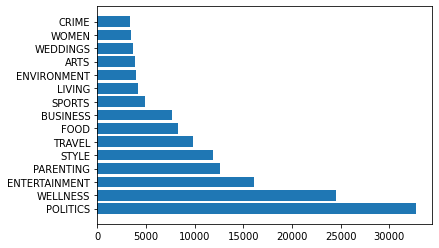

In [ ]:
import matplotlib.pyplot as plt
plt.barh(df1['category'],df1['count'])

In [ ]:
import numpy as np
no_of_cat = 3400
jumble = df.reindex(np.random.permutation(df.index))
ARTS = jumble[jumble['category'] == 'ARTS'][:no_of_cat]
BUSINESS = jumble[jumble['category'] == 'BUSINESS'][:no_of_cat]
#EDUCATION = jumble[jumble['category'] == 'EDUCATION'][:no_of_cat]
CRIME = jumble[jumble['category'] == 'CRIME'][:no_of_cat]
SPORTS = jumble[jumble['category'] == 'SPORTS'][:no_of_cat]
WELLNESS = jumble[jumble['category'] == 'WELLNESS'][:no_of_cat]
FOOD = jumble[jumble['category'] == 'FOOD'][:no_of_cat]
#TECH = jumble[jumble['category'] == 'TECH'][:no_of_cat]
STYLE = jumble[jumble['category'] == 'STYLE'][:no_of_cat]
ENVIRONMENT = jumble[jumble['category'] == 'ENVIRONMENT'][:no_of_cat]
ENTERTAINMENT = jumble[jumble['category'] == 'ENTERTAINMENT'][:no_of_cat]

WOMEN = jumble[jumble['category'] == 'WOMEN'][:no_of_cat]
LIVING = jumble[jumble['category'] == 'LIVING'][:no_of_cat]
#IMPACT = jumble[jumble['category'] == 'IMPACT'][:no_of_cat]
PARENTING = jumble[jumble['category'] == 'PARENTING'][:no_of_cat]
POLITICS = jumble[jumble['category'] == 'POLITICS'][:no_of_cat]
#RELIGION = jumble[jumble['category'] == 'RELIGION'][:no_of_cat]
#SCIENCE = jumble[jumble['category'] == 'SCIENCE'][:no_of_cat]
TRAVEL = jumble[jumble['category'] == 'TRAVEL'][:no_of_cat]
WEDDINGS = jumble[jumble['category'] == 'WEDDINGS'][:no_of_cat] 


merged = pd.concat([ARTS,BUSINESS,CRIME,SPORTS,WELLNESS,FOOD,STYLE,ENVIRONMENT,ENTERTAINMENT,WOMEN,LIVING,PARENTING,POLITICS,TRAVEL,WEDDINGS], ignore_index=True)
#Shuffle the dataset
merged = merged.reindex(np.random.permutation(merged.index))
merged['LABEL'] = 0

In [ ]:
merged.loc[merged['category'] == 'ARTS', 'LABEL'] = 0
merged.loc[merged['category'] == 'BUSINESS', 'LABEL'] = 1
#merged.loc[merged['category'] == 'EDUCATION', 'LABEL'] = 2
merged.loc[merged['category'] == 'CRIME', 'LABEL'] = 2
merged.loc[merged['category'] == 'SPORTS', 'LABEL'] = 3
merged.loc[merged['category'] == 'WELLNESS', 'LABEL'] = 4
merged.loc[merged['category'] == 'FOOD', 'LABEL'] = 5
#merged.loc[merged['category'] == 'TECH', 'LABEL'] = 6
merged.loc[merged['category'] == 'STYLE', 'LABEL'] = 6
merged.loc[merged['category'] == 'ENVIRONMENT', 'LABEL'] = 7

merged.loc[merged['category'] == 'WOMEN', 'LABEL'] = 8
merged.loc[merged['category'] == 'LIVING', 'LABEL'] = 9
#merged.loc[merged['category'] == 'IMPACT', 'LABEL'] = 10
merged.loc[merged['category'] == 'PARENTING', 'LABEL'] = 10
merged.loc[merged['category'] == 'POLITICS', 'LABEL'] = 11
#merged.loc[merged['category'] == 'RELIGION', 'LABEL'] = 12
#merged.loc[merged['category'] == 'SCIENCE', 'LABEL'] = 12
merged.loc[merged['category'] == 'TRAVEL', 'LABEL'] = 12
merged.loc[merged['category'] == 'WEDDINGS', 'LABEL'] = 13
merged.loc[merged['category'] == 'ENTERTAINMENT', 'LABEL'] = 14

print(merged['LABEL'][:10])
labels = to_categorical(merged['LABEL'], num_classes=15)
print(labels[:20])
if 'category' in merged.keys():
    merged.drop(['category'], axis=1)

43216    11
21806     6
15187     4
42891    11
7309      2
42228    11
44717    12
34200     9
2106      0
31119     8
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
merged

,category,text,LABEL
43216,POLITICS,Jailed Saudi Blogger Raif Badawi Honored by PE...,11
21806,STYLE,Art 2 Wear : Coco and BreezyLast year in SoHo ...,6
15187,WELLNESS,Nutritionists' Favorite Healthy Kitchen Gadget...,4
42891,POLITICS,Florida Lawmaker On School Shooting Survivors:...,11
7309,CRIME,Mental Illness and Racist Prison Ties Yield Cl...,2
...,...,...,...
42316,POLITICS,More Farmers Around The World Water Crops With...,11
46764,TRAVEL,"The Shard, Western Europe's New Tallest Buildi...",12
21253,STYLE,Kanye West Twitter Rant Blasts Khaki Cargo Sho...,6
9129,CRIME,"Zakieya Latrice Avery, Mother, Stabbed 2 Kids ...",2


In [ ]:
n_most_common_words = 18000
max_len = 50
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(merged['text'].values)
sequences = tokenizer.texts_to_sequences(merged['text'].values)  
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 90881 unique tokens.


In [ ]:
sequences

[[6652,
  5627,
  1692,
  4656,
  36,
  5628,
  9028,
  1179,
  1,
  1150,
  1757,
  4,
  1,
  1327,
  11656,
  4,
  5627,
  7814,
  6,
  665,
  828,
  711,
  60,
  11,
  94,
  2,
  464,
  13902,
  5316,
  5627,
  1941,
  11,
  92,
  859,
  2545,
  34,
  25,
  71,
  92,
  25,
  17,
  657,
  2,
  316,
  11,
  37,
  71,
  134,
  1431],
 [158,
  227,
  603,
  5810,
  5,
  63,
  6,
  8198,
  15,
  24,
  4221,
  2,
  1,
  846,
  3558,
  20,
  3054,
  5810,
  5,
  10167,
  3245,
  15,
  354,
  1,
  168,
  15423,
  11657,
  94,
  199,
  1606,
  27,
  15,
  1228,
  532,
  51,
  13,
  761],
 [239,
  377,
  602,
  14,
  244,
  2,
  225,
  847,
  377,
  5,
  1107,
  1906,
  112,
  185,
  35,
  232,
  3,
  141,
  644,
  4,
  150,
  6,
  1,
  602,
  15,
  493,
  66,
  4,
  33,
  239,
  7174,
  10834,
  2,
  457,
  44,
  185,
  602,
  7815,
  2042],
 [610,
  7492,
  10,
  192,
  381,
  2656,
  61,
  1,
  22,
  1583,
  1,
  191,
  2,
  316,
  69,
  9,
  22,
  105,
  1419,
  3,
  569,
  9,
  144,
  46

**Model LSTM**

**1. spliting train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

**2. setting model**

In [ ]:
epochs = 30
emb_dim = 100
batch_size = 50

In [ ]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(128 , dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(15, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 100)           1800000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 15)                1935      
Total params: 1,919,183
Trainable params: 1,919,183
Non-trainable params: 0
_________________________________________________________________
None


**3. training model**

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 30600 samples, validate on 7650 samples
Epoch 1/30
30600/30600 [==============================] - 81s 3ms/step - loss: 2.6608 - acc: 0.0985 - val_loss: 2.4914 - val_acc: 0.1349
Epoch 2/30
30600/30600 [==============================] - 80s 3ms/step - loss: 2.4777 - acc: 0.1515 - val_loss: 2.3376 - val_acc: 0.1946
Epoch 3/30
30600/30600 [==============================] - 81s 3ms/step - loss: 2.3524 - acc: 0.1935 - val_loss: 2.1596 - val_acc: 0.2744
Epoch 4/30
30600/30600 [==============================] - 82s 3ms/step - loss: 2.2160 - acc: 0.2480 - val_loss: 1.9901 - val_acc: 0.3518
Epoch 5/30
30600/30600 [==============================] - 82s 3ms/step - loss: 2.0653 - acc: 0.3080 - val_loss: 1.7858 - val_acc: 0.4237
Epoch 6/30
30600/30600 [==============================] - 81s 3ms/step - loss: 1.9383 - acc: 0.3528 - val_loss: 1.6685 - val_acc: 0.4694
Epoch 7/30
30600/30600 [==============================] - 81s 3ms/step - loss: 1.8124 - acc: 0.3991 - val_loss: 1.5271 - val_acc:

**Performance  Evaluation**

In [ ]:
accur = model.evaluate(X_train,y_train)
print('Training set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accur[0],accur[1]))

38250/38250 [==============================] - 20s 530us/step
Training set
  Loss: 0.603
  Accuracy: 0.822


In [ ]:
print(history)

In [ ]:
accur = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accur[0],accur[1]))

12750/12750 [==============================] - 7s 511us/step
Test set
  Loss: 1.069
  Accuracy: 0.711


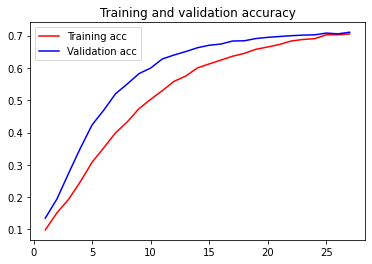

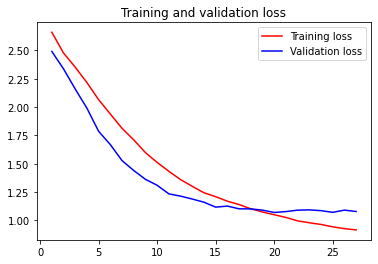

In [ ]:
# Trainig-Testing Plot
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

**2. Confusion Matrix**

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1)))

from IPython.display import display
pd.options.display.max_columns = None
display(cm)

**Prediction on given txt**

In [ ]:
txt = ["The coronavirus will push the euro zone economy into an unprecedented peacetime slump, European Central Bank chief Christine Lagarde said today, vowing to use all the bank's tools to help combat the downturn."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['ENTERTAINMENT', 'BUSINESS', 'LIVING', 'ARTS','WELLNESS']
print(pred, labels[np.argmax(pred)])